벡터 a: [4 1], 벡터 b: [2 3]
벡터 a의 길이 |a|: 4.1231
벡터 b의 길이 |b|: 3.6056
사잇각 theta: 42.27도
----------------------------------------
[좌변] np.dot(a, b) 결과      : 11.0000
[우변] |a||b|cos(theta) 결과  : 11.0000

✅ 두 결과가 일치합니다! (증명 성공)


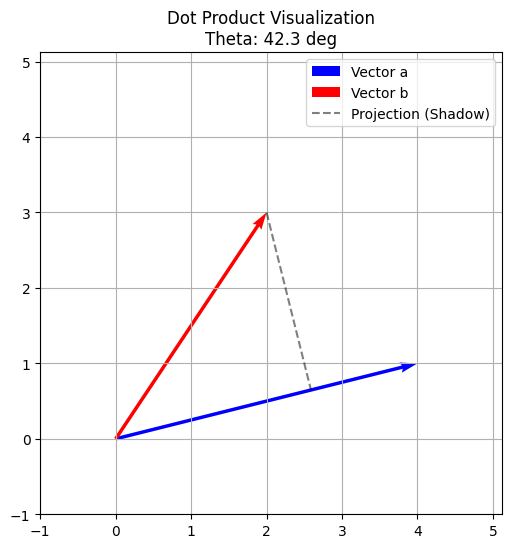

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_dot_product(a, b):
    # ---------------------------------------------------------
    # 1. 좌변 계산: 대수적 내적 (Algebraic Dot Product)
    # 공식: x1*x2 + y1*y2
    # ---------------------------------------------------------
    dot_algebraic = np.dot(a, b)

    # ---------------------------------------------------------
    # 2. 우변 계산: 기하학적 내적 (Geometric Formula)
    # 공식: |a| * |b| * cos(theta)
    # ---------------------------------------------------------

    # 2-1. 벡터의 길이 (Norm/Magnitude) 계산
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)

    # 2-2. 두 벡터 사이의 사잇각(theta) 계산 (아크탄젠트 사용)
    # 내적 공식을 쓰지 않고, 좌표를 이용해 순수하게 각도만 구함
    angle_a = np.arctan2(a[1], a[0])
    angle_b = np.arctan2(b[1], b[0])
    theta_rad = np.abs(angle_a - angle_b) # 라디안 각도 차이
    theta_deg = np.degrees(theta_rad)     # 도(degree)로 변환

    # 2-3. 공식 대입
    dot_geometric = norm_a * norm_b * np.cos(theta_rad)

    # ---------------------------------------------------------
    # 3. 결과 출력
    # ---------------------------------------------------------
    print(f"벡터 a: {a}, 벡터 b: {b}")
    print(f"벡터 a의 길이 |a|: {norm_a:.4f}")
    print(f"벡터 b의 길이 |b|: {norm_b:.4f}")
    print(f"사잇각 theta: {theta_deg:.2f}도")
    print("-" * 40)
    print(f"[좌변] np.dot(a, b) 결과      : {dot_algebraic:.4f}")
    print(f"[우변] |a||b|cos(theta) 결과  : {dot_geometric:.4f}")

    if np.isclose(dot_algebraic, dot_geometric):
        print("\n✅ 두 결과가 일치합니다! (증명 성공)")
    else:
        print("\n❌ 결과가 다릅니다.")

    # ---------------------------------------------------------
    # 4. 시각화 (그래프 그리기)
    # ---------------------------------------------------------
    plt.figure(figsize=(6, 6))

    # 벡터 그리기 (화살표)
    plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector a')
    plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector b')

    # 투영된 그림자 선 그리기 (b에서 a로 수선의 발)
    # 투영 벡터 p = (a dot b / |a|^2) * a
    proj_factor = np.dot(a, b) / (norm_a**2)
    proj_vec = proj_factor * a
    plt.plot([b[0], proj_vec[0]], [b[1], proj_vec[1]], 'k--', alpha=0.5, label='Projection (Shadow)')

    # 설정
    limit = max(norm_a, norm_b) + 1
    plt.xlim(-1, limit)
    plt.ylim(-1, limit)
    plt.grid()
    plt.legend()
    plt.title(f"Dot Product Visualization\nTheta: {theta_deg:.1f} deg")
    plt.gca().set_aspect('equal')
    plt.show()

# 테스트 실행
# a는 x축 위의 벡터, b는 45도 각도의 벡터로 설정
vec_a = np.array([4, 1])
vec_b = np.array([2, 3])

visualize_dot_product(vec_a, vec_b)

## 1. 데이터와 디자인 행렬

샘플 3개, 특성 1개인 선형회귀 문제를 가정한다.

$$
X =
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix},
\quad
y =
\begin{bmatrix}
1 \\
2 \\
2
\end{bmatrix}
$$

- \(X\): 입력 데이터(디자인 행렬)
- \(y\): 관측된 출력값

---

## 2. \(X^T X\) 계산

$$
X^T X
=
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
=
1^2 + 2^2 + 3^2
=
14
$$

**의미**  
입력 데이터의 크기와 분산을 요약한 값이며,  
입력 정보가 얼마나 충분한지를 나타낸다.

---

## 3. \((X^T X)^{-1}\)

$$
(X^T X)^{-1} = \frac{1}{14}
$$

**의미**  
입력 데이터가 만들어낸 스케일과 중복 효과를 보정하는 항으로,  
유일한 회귀 해를 가능하게 한다.

---

## 4. 최소제곱 회귀 해

선형회귀의 해는 다음과 같다.

$$
w = (X^T X)^{-1} X^T y
$$

먼저,

$$
X^T y = 1\cdot1 + 2\cdot2 + 3\cdot2 = 11
$$

따라서,

$$
w = \frac{11}{14} \approx 0.786
$$

**의미**  
전체 데이터를 가장 잘 설명하는 하나의 기울기(가중치).

---

## 5. 중복된 특성이 있을 경우

두 특성이 완전히 중복된 데이터:

$$
X =
\begin{bmatrix}
1 & 2 \\
2 & 4 \\
3 & 6
\end{bmatrix}
$$

$$
X^T X =
\begin{bmatrix}
14 & 28 \\
28 & 56
\end{bmatrix}
$$

행렬식은

$$
\det(X^T X) = 0
$$

**의미**  
특성 간 정보가 중복되어 역행렬이 존재하지 않으며,  
회귀 계수를 유일하게 정할 수 없다.

---

## 6. 핵심 정리

$$
(X^T X)^{-1} \text{ 이 존재한다 }
\;\Longleftrightarrow\;
\text{입력 특성 간 중복이 없다}
$$

> \((X^T X)^{-1}\) 은  
> 입력 데이터의 중복 정보를 제거하여  
> 유일한 회귀 해를 가능하게 하는 핵심 요소이다.


계산된 절편(Bias): 5.7706
계산된 기울기(Weight): 3.0378

--- 직교(수직) 여부 확인 (내적값) ---
1. 상수항(Bias) 열과 오차의 내적: -0.0000000000
2. 입력데이터(X) 열과 오차의 내적: -0.0000000000
-> 수치가 0에 매우 가까우므로 수학적으로 '수직'입니다.


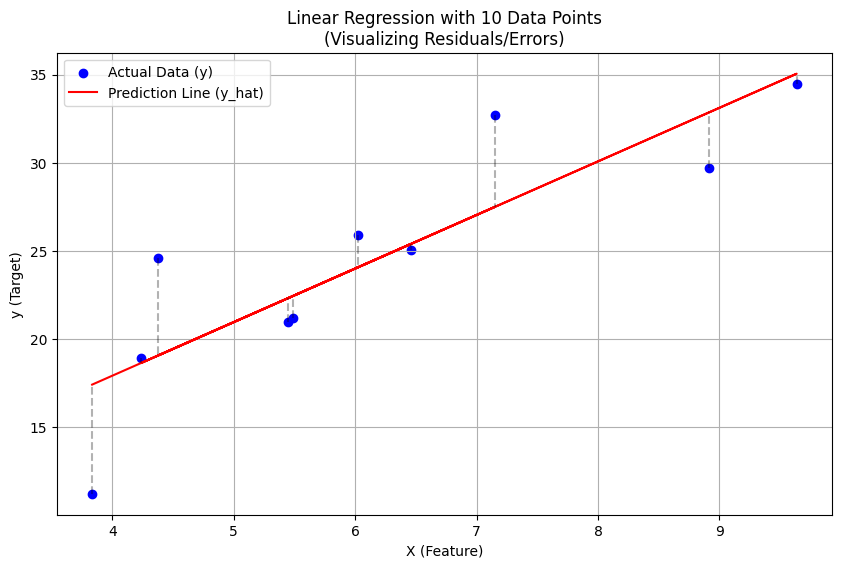

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. 데이터 생성 (10개)
# ---------------------------------------------------------
np.random.seed(0) # 결과 재현을 위해 시드 고정

# X: 입력 데이터 (0 ~ 10 사이의 무작위 숫자 10개)
X = 10 * np.random.rand(10, 1)

# y: 정답 데이터 (y = 3x + 4 + 노이즈)
# 실제 관계: 기울기 3, 절편 4
y = 4 + 3 * X + np.random.randn(10, 1) * 5

# ---------------------------------------------------------
# 2. 정규방정식으로 최적의 파라미터(w) 계산
# ---------------------------------------------------------
# 절편(Bias) 계산을 위해 X 앞에 1로 채워진 열(Column) 추가
X_b = np.c_[np.ones((10, 1)), X]

# 공식: theta = (X^T * X)^-1 * X^T * y
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print(f"계산된 절편(Bias): {theta_best[0][0]:.4f}")
print(f"계산된 기울기(Weight): {theta_best[1][0]:.4f}")

# ---------------------------------------------------------
# 3. 예측 및 오차 계산
# ---------------------------------------------------------
y_predict = X_b @ theta_best   # 예측값
error_vector = y - y_predict   # 오차 벡터 (실제값 - 예측값)

# ---------------------------------------------------------
# 4. ★핵심 검증★: 입력(X)와 오차(Error)는 수직인가?
# ---------------------------------------------------------
# X의 각 열(1로 된 열, 데이터 열)과 오차 벡터를 내적합니다.
orthogonality_check = X_b.T @ error_vector

print("\n--- 직교(수직) 여부 확인 (내적값) ---")
print(f"1. 상수항(Bias) 열과 오차의 내적: {orthogonality_check[0][0]:.10f}")
print(f"2. 입력데이터(X) 열과 오차의 내적: {orthogonality_check[1][0]:.10f}")
print("-> 수치가 0에 매우 가까우므로 수학적으로 '수직'입니다.")

# ---------------------------------------------------------
# 5. 시각화 (산점도와 회귀선)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

# 데이터 점 찍기
plt.scatter(X, y, color='blue', label='Actual Data (y)')

# 회귀선 그리기
plt.plot(X, y_predict, color='red', label='Prediction Line (y_hat)')

# 오차(Error) 시각화 (각 점과 선 사이의 거리)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_predict[i]], 'k--', alpha=0.3)

plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.legend()
plt.title(f"Linear Regression with 10 Data Points\n(Visualizing Residuals/Errors)")
plt.grid(True)
plt.show()

### **parameter(w)는 y를 x의 열 공간에 정사영 했을 떄의 좌표값을 생성(직선식)**

$$
(X^\top X)^{-1} X^\top y
=
{w}
$$


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_vectors(v1, v2, name):
    # 1. 내적 (Dot Product)
    dot_val = np.dot(v1, v2)

    # 2. 크기 (Norm)
    norm1 = np.linalg.norm(v1)
    norm2 = np.linalg.norm(v2)

    # 3. 코사인 유사도 (Cosine Similarity)
    # 내적 / (길이 * 길이)
    cos_sim = dot_val / (norm1 * norm2)

    print(f"--- {name} ---")
    print(f"벡터: {v1}, {v2}")
    print(f"내적 값 (Dot): {dot_val:.2f}")
    print(f"코사인 유사도 (Similarity): {cos_sim:.4f} (1에 가까울수록 유사)")
    return dot_val, cos_sim

# 케이스 1: 길이는 엄청 긴데, 방향은 좀 다른 벡터 (60도 차이)
# (x축으로 100, y축으로 173 -> 각도 약 60도)
vec_a = np.array([100, 0])
vec_b = np.array([50, 86.6])

# 케이스 2: 길이는 아주 작은데, 방향은 완벽히 똑같은 벡터 (0도 차이)
vec_c = np.array([1, 0])
vec_d = np.array([2, 0])

print("결과 비교:\n")
dot1, sim1 = analyze_vectors(vec_a, vec_b, "Case 1: 거인들 (방향 60도 차이)")
print("")
dot2, sim2 = analyze_vectors(vec_c, vec_d, "Case 2: 소인들 (방향 일치)")

print("\n------------------------------------------------")
print(f"내적 값 비교: {dot1:.0f} (Case 1) >>> {dot2:.0f} (Case 2)")
print("-> 내적만 보면 Case 1이 5000배 더 커 보입니다.")
print(f"실제 유사도 비교: {sim1:.4f} (Case 1) < {sim2:.4f} (Case 2)")
print("-> 하지만 코사인 유사도를 보면 Case 2(1.0)가 더 유사합니다.")

결과 비교:

--- Case 1: 거인들 (방향 60도 차이) ---
벡터: [100   0], [50.  86.6]
내적 값 (Dot): 5000.00
코사인 유사도 (Similarity): 0.5000 (1에 가까울수록 유사)

--- Case 2: 소인들 (방향 일치) ---
벡터: [1 0], [2 0]
내적 값 (Dot): 2.00
코사인 유사도 (Similarity): 1.0000 (1에 가까울수록 유사)

------------------------------------------------
내적 값 비교: 5000 (Case 1) >>> 2 (Case 2)
-> 내적만 보면 Case 1이 5000배 더 커 보입니다.
실제 유사도 비교: 0.5000 (Case 1) < 1.0000 (Case 2)
-> 하지만 코사인 유사도를 보면 Case 2(1.0)가 더 유사합니다.


### **상관관계(Correlation)는 평균을 뺀 벡터(Centered Vector)들의 코사인 유사도**

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 생성
# 키(x)와 몸무게(y)라고 가정
x = np.array([150, 160, 170, 180, 190])
y = np.array([ 50,  55,  65,  70,  85])

# ---------------------------------------------------------
# [방법 1] 라이브러리(Numpy) 사용
# ---------------------------------------------------------
corr_np = np.corrcoef(x, y)[0, 1]
print(f"1. Numpy 함수로 구한 상관계수: {corr_np:.4f}")

# ---------------------------------------------------------
# [방법 2] 선형대수(내적)로 직접 구현 (수식 분해)
# 공식: r = (x_c · y_c) / (|x_c| * |y_c|)
# ---------------------------------------------------------

# 단계 1: 평균 빼기 (Mean Centering)
# -> 데이터의 중심을 원점(0)으로 이동시킵니다.
# -> 이제부터는 '절대값'이 아니라 '평균 대비 변화량'을 벡터로 봅니다.
x_mean = np.mean(x)
y_mean = np.mean(y)

x_centered = x - x_mean
y_centered = y - y_mean

print(f"\n[단계 1] 평균 뺀 벡터(Centered Vector):")
print(f"   x_c: {x_centered}")
print(f"   y_c: {y_centered}")

# 단계 2: 내적 (Dot Product) 수행
# -> 두 벡터가 같은 방향으로 움직이는지 확인 (공분산의 분자 부분)
dot_product = np.dot(x_centered, y_centered)

# 단계 3: 벡터의 크기(Norm) 계산
# -> 통계에서는 이것이 곧 '표준편차 * sqrt(n)'과 관련됨
norm_x = np.linalg.norm(x_centered)
norm_y = np.linalg.norm(y_centered)

# 단계 4: 코사인 유사도 계산 (내적 / 크기곱)
# -> 이것이 곧 상관계수입니다.
correlation_manual = dot_product / (norm_x * norm_y)

print(f"\n2. 내적으로 직접 계산한 상관계수: {correlation_manual:.4f}")

# ---------------------------------------------------------
# 검증
# ---------------------------------------------------------
if np.isclose(corr_np, correlation_manual):
    print("\n✅ 결과 일치! (상관계수 == 중심화된 벡터의 코사인 유사도)")
else:
    print("\n❌ 결과 불일치")

1. Numpy 함수로 구한 상관계수: 0.9815

[단계 1] 평균 뺀 벡터(Centered Vector):
   x_c: [-20. -10.   0.  10.  20.]
   y_c: [-15. -10.   0.   5.  20.]

2. 내적으로 직접 계산한 상관계수: 0.9815

✅ 결과 일치! (상관계수 == 중심화된 벡터의 코사인 유사도)
